In [448]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.interpolate as interp
import matplotlib as mpl

In [449]:
nstars_wfirst = 245#148#100#
nstars_wfirst_m10 = 2467#1519# 100#

## Construct Pal 5 like stream

In [450]:

pal5_width = 0.058 #kpc
pal5_length = 8.5 #kpc

#### Correct for Andromeda tides ####
v_circ_MW = 220 #km/s
v_circ_M31 = 250 #km/s Chemin et al 2009 HI emission
v_corr =  (1/(250/220)**(2/3.)) #r_t smaller as the tidal field from M31 is larger 


m_corr = (10)**(1/3.)

##### Correct for various locations in Galaxy
R_p = np.array([15,35,55]) # kpc we use these three different R_GCs

Rp_corr = np.zeros(len(R_p))
for i in range(len(R_p)):
    Rp_corr[i] = (R_p[i]/R_p[0])**(2/3.) #gets longer and wider width distance 

### Correct for the fact that T_psi changes (less completed orbits)
##THIS IS THE ANGULAR EXTENT
psi_corr  = np.zeros(len(R_p))
for i in range(len(R_p)):
    psi_corr[i] = (R_p[0]/R_p[i]) #angular length gets smaller.


In [451]:
# Pal 5 like stream:

#### R_GC = 15 kpc ####
print('m: Pal5')
print('R_GC = 15 kpc')
w_15 = pal5_width * v_corr * Rp_corr[0] 
l_15 = pal5_length * v_corr * Rp_corr[0] #* psi_corr[0]
print('w = ' +  str(np.round(w_15,3)) + ' kpc')
print('')

#### R_GC = 35 kpc ####
print('R_GC = 35 kpc')
w_35 = pal5_width * v_corr * Rp_corr[1] 
l_35 = pal5_length * v_corr * Rp_corr[1] #* psi_corr[1]
print('w = ' +  str(np.round(w_35,3)) + ' kpc')
print('')

#### R_GC = 55 kpc ####
print('R_GC = 55 kpc')
w_55 = pal5_width * v_corr * Rp_corr[2] 
l_55 = pal5_length * v_corr * Rp_corr[2] 
print('w = ' +  str(np.round(w_55,3)) + ' kpc')
print('')

print('')
print('')
# Pal 5 like stream:

#### R_GC = 15 kpc ####
print('m:10 x Pal5') 
print('R_GC = 15 kpc')
w = pal5_width * m_corr * v_corr * Rp_corr[0] 
l = pal5_length * m_corr * v_corr * Rp_corr[0] #* psi_corr[0]
print('w = ' +  str(np.round(w,3)) + ' kpc')
print('')

#### R_GC = 35 kpc ####
print('R_GC = 35 kpc')
w = pal5_width * m_corr * v_corr * Rp_corr[1] 
l = pal5_length * m_corr * v_corr * Rp_corr[1] #* psi_corr[1]
print('w = ' +  str(np.round(w,3)) + ' kpc')
print('')

#### R_GC = 55 kpc ####
print('R_GC = 55 kpc')
w = pal5_width * m_corr* v_corr * Rp_corr[2] 
l = pal5_length * m_corr * v_corr * Rp_corr[2] 
print('w = ' +  str(np.round(w,3)) + ' kpc')
print('')

m: Pal5
R_GC = 15 kpc
w = 0.053 kpc

R_GC = 35 kpc
w = 0.094 kpc

R_GC = 55 kpc
w = 0.127 kpc



m:10 x Pal5
R_GC = 15 kpc
w = 0.115 kpc

R_GC = 35 kpc
w = 0.202 kpc

R_GC = 55 kpc
w = 0.273 kpc



In [452]:
######### NEW LENGTH CALC ####### 02/25/19
#Because I am computing arcs of circle based on angles:
circumfr = 2*np.pi*R_p

v_corr_L = (250/220)**(1/3.)


lengths_kpc = np.array([8.5,8.5, 8.5])*v_corr_L
lengths_kpc_m10 = lengths_kpc  * m_corr

#Now we correct for angle! Meaning a factor of R_p less in angular extent. 
lengths_kpc_ang = np.array([l_15 *(R_p[0]/R_p[0])**(-1/3),\
                            l_35*(R_p[1]/R_p[0])**(-1/3),\
                            l_55*(R_p[2]/R_p[0])**(-1/3)])# Without correcting for angle (T_psi)
lengths_kpc_m10_ang = lengths_kpc_ang * m_corr
print('Lengths for pal-5like stream at 3 radii: ')
print(lengths_kpc_ang)
print('')
print('Lengths for 10x mass stream at 3 radii: ')
print(lengths_kpc_m10_ang)
print('')


print('sanity check for circle arc plotting')
circ_corr = np.array([12.0755,21.24,28.7]) #just to get from full circle down to 7.81 kpc
print(circumfr / circ_corr) #Only doing this because I am plotting as a fraction of a circle

#Do it for more massive stream to
print(circumfr / circ_corr*m_corr) #Only doing this because I am plotting as a fraction of a circle
#lengths_kpc 


Lengths for pal-5like stream at 3 radii: 
[ 7.80561944 10.3530021  12.03643433]

Lengths for 10x mass stream at 3 radii: 
[16.81669731 22.30486688 25.93171166]

sanity check for circle arc plotting
[ 7.80487596 10.35364811 12.04094745]
[16.81509551 22.30625865 25.94143489]


In [453]:
import astropy.units as u


###### First correct them all by the fraction to make it right length at R=15 kpc

#I divide 360 by fac to make it 7.81
theta1 = np.array([(90-360/circ_corr[0])*u.deg.to(u.rad),    \
                   (90-360/circ_corr[1])*u.deg.to(u.rad),\
                   (90-360/circ_corr[2])*u.deg.to(u.rad)])  
#sets length of streams, should vary for each 

theta2 = np.array([90*u.deg.to(u.rad),90*u.deg.to(u.rad),90*u.deg.to(u.rad)])


theta1_m10 = np.array([(90-360/circ_corr[0]*m_corr)*u.deg.to(u.rad),    \
                   (90-360/circ_corr[1]*m_corr)*u.deg.to(u.rad),\
                   (90-360/circ_corr[2]*m_corr)*u.deg.to(u.rad)])  
#sets length of streams, should vary for each 

theta2_m10 = np.array([90*u.deg.to(u.rad),90*u.deg.to(u.rad),90*u.deg.to(u.rad)])

In [454]:
num_samples = nstars_wfirst #this is the amount of stars 

theta = np.zeros([num_samples,len(R_p)])
for i in range(theta.shape[1]):
    theta[:,i] = np.random.uniform(theta1[i], theta2[i], num_samples)#*rand_dist_angle #spread out circle 
#theta = np.linspace(theta1, theta2, num_samples)

#Here I correct width for v_corr
rand_dist_width = np.random.uniform(-pal5_width/2*v_corr, pal5_width/2*v_corr, num_samples) #such that they are rand. spread in angle 
#I have three different distances , r array


#Here I correct width for Rp
dr = np.zeros([num_samples,len(R_p)])
for i in range(dr.shape[1]):
    dr[:,i] = 1 * rand_dist_width * Rp_corr[i] 
    #scale such that width gets udpated based on post in galacy


r_rand = np.ones([num_samples,len(R_p)])*R_p + dr   #R_p here puts the streams at 3 GC radii
x,y = r_rand * np.cos(theta), r_rand * np.sin(theta)

## Construct massive stream

In [455]:
num_samples_m10 = nstars_wfirst_m10 #this is the amount of stars 

theta = np.zeros([num_samples_m10,len(R_p)])
for i in range(theta.shape[1]):
    theta[:,i] = np.random.uniform(theta1_m10[i], theta2_m10[i], num_samples_m10)#*rand_dist_angle #spread out circle 
#theta = np.linspace(theta1, theta2, num_samples)

#Here I correct width for v_corr
rand_dist_width = np.random.uniform(-pal5_width/2*v_corr * m_corr, \
                                    pal5_width/2*v_corr * m_corr, num_samples_m10) #such that they are rand. spread in angle 
#I have three different distances , r array


#Here I correct width for Rp
dr = np.zeros([num_samples_m10,len(R_p)])
for i in range(dr.shape[1]):
    dr[:,i] = 1 * rand_dist_width * Rp_corr[i] 
    #scale such that width gets udpated based on post in galacy

    
#Here I correct length for Rp_corr    
r_rand = np.ones([num_samples_m10,len(R_p)])*R_p + dr   #R_p here puts the streams at 3 GC radii
x_m10,y_m10 = r_rand * np.cos(theta), r_rand * np.sin(theta)

In [456]:
pal5_x_GC15 = x[:,0]
pal5_x_GC35 = x[:,1]
pal5_x_GC55 = x[:,2]

pal5_y_GC15 = y[:,0]
pal5_y_GC35 = y[:,1]
pal5_y_GC55 = y[:,2]



pal5_x_m10_GC15 = x_m10[:,0]
pal5_x_m10_GC35 = x_m10[:,1]
pal5_x_m10_GC55 = x_m10[:,2]

pal5_y_m10_GC15 = y_m10[:,0]
pal5_y_m10_GC35 = y_m10[:,1]
pal5_y_m10_GC55 = y_m10[:,2]

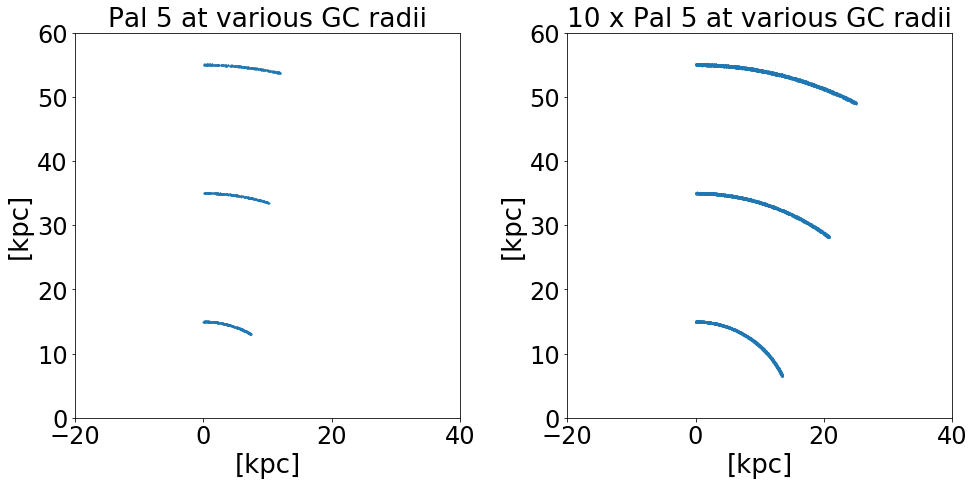

In [457]:
fig,axes = plt.subplots(1,2,figsize=(14,7))
#SEE https://matplotlib.org/api/_as_gen/matplotlib.patches.Arc.html
mpl.rcParams.update({'font.size': 22})
label_size = 22
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


axes[0].scatter(x,y, s=1)
axes[0].set_ylim([0,60])
axes[0].set_xlim([-20,40])
axes[0].set_xlabel('[kpc]')
axes[0].set_ylabel('[kpc]')
axes[0].set_title('Pal 5 at various GC radii')
axes[0].set_aspect('equal')


axes[1].scatter(x_m10,y_m10, s=1)
axes[1].set_ylim([0,60])
axes[1].set_xlim([-20,40])
axes[1].set_xlabel('[kpc]')
axes[1].set_ylabel('[kpc]')
axes[1].set_title('10 x Pal 5 at various GC radii')
axes[1].set_aspect('equal')

fig.tight_layout()
#fig.savefig("GreatCircles_angular_R23rds.png")
###IMPORTANT SOME OF THESE AR CLUSTER STARS?? - no they're not! 


##### DO THIS FOR OTHER BAND!!######

In [458]:
# #####READ IN WFIRST LIKE BACKGROUND FIELDS ######


# from astropy.io.votable import parse_single_table
# table_box10 = parse_single_table("/Users/spearson/Desktop/Research/Pal5External/M31_10_20kpc_new.vot").to_table()
# table_box30 = parse_single_table("/Users/spearson/Desktop/Research/Pal5External/M31_30_40kpc_new.vot").to_table()
# table_box50 = parse_single_table("/Users/spearson/Desktop/Research/Pal5External/M31_50_60kpc_new.vot").to_table()

table_box10 = np.genfromtxt('WFIfilters_extendedIsochrones_M31_10_20kpc.txt')
table_box30 = np.genfromtxt('WFIfilters_extendedIsochrones_M31_30_40kpc.txt')
table_box50 = np.genfromtxt('WFIfilters_extendedIsochrones_M31_50_60kpc.txt')


In [459]:
d_conv = 785*np.pi/180 #To go from deg to kpc in Andromeda


x_box10 = table_box10[:,0]*(-d_conv)
y_box10 = table_box10[:,1]*(d_conv)
#g_box10 = table_box10['g']
#i_box10 = table_box10['i']

x_box30 = table_box30[:,0]*(-d_conv)
y_box30 = table_box30[:,1]*(d_conv)
#g_box30 = table_box30['g']
#i_box30 = table_box30['i']

x_box50 = table_box50[:,0]*(-d_conv)
y_box50 = table_box50[:,1]*(d_conv)
#g_box50 = table_box50['g']
#i_box50 = table_box50['i']

In [460]:
### Make metallicity cuts

index_FeH0_10 = np.where(table_box10[:,2] < 0)
index_FeH0_30 = np.where(table_box30[:,2] < 0)
index_FeH0_50 = np.where(table_box50[:,2] < 0)

index_FeH1_10 = np.where(table_box10[:,2] < -1)
index_FeH1_30 = np.where(table_box30[:,2] < -1)
index_FeH1_50 = np.where(table_box50[:,2] < -1)

In [461]:
print(x_box10.shape)
print(x_box10[index_FeH0_10].shape)
print(x_box10[index_FeH1_10].shape)
print('')
print('')
print(x_box30.shape)
print(x_box30[index_FeH0_30].shape)
print(x_box30[index_FeH1_30].shape)
print('')
print('')
print(x_box50.shape)
print(x_box50[index_FeH0_50].shape)
print(x_box50[index_FeH1_50].shape)

(934087,)
(898589,)
(837085,)


(279089,)
(244154,)
(232579,)


(318684,)
(277066,)
(263204,)


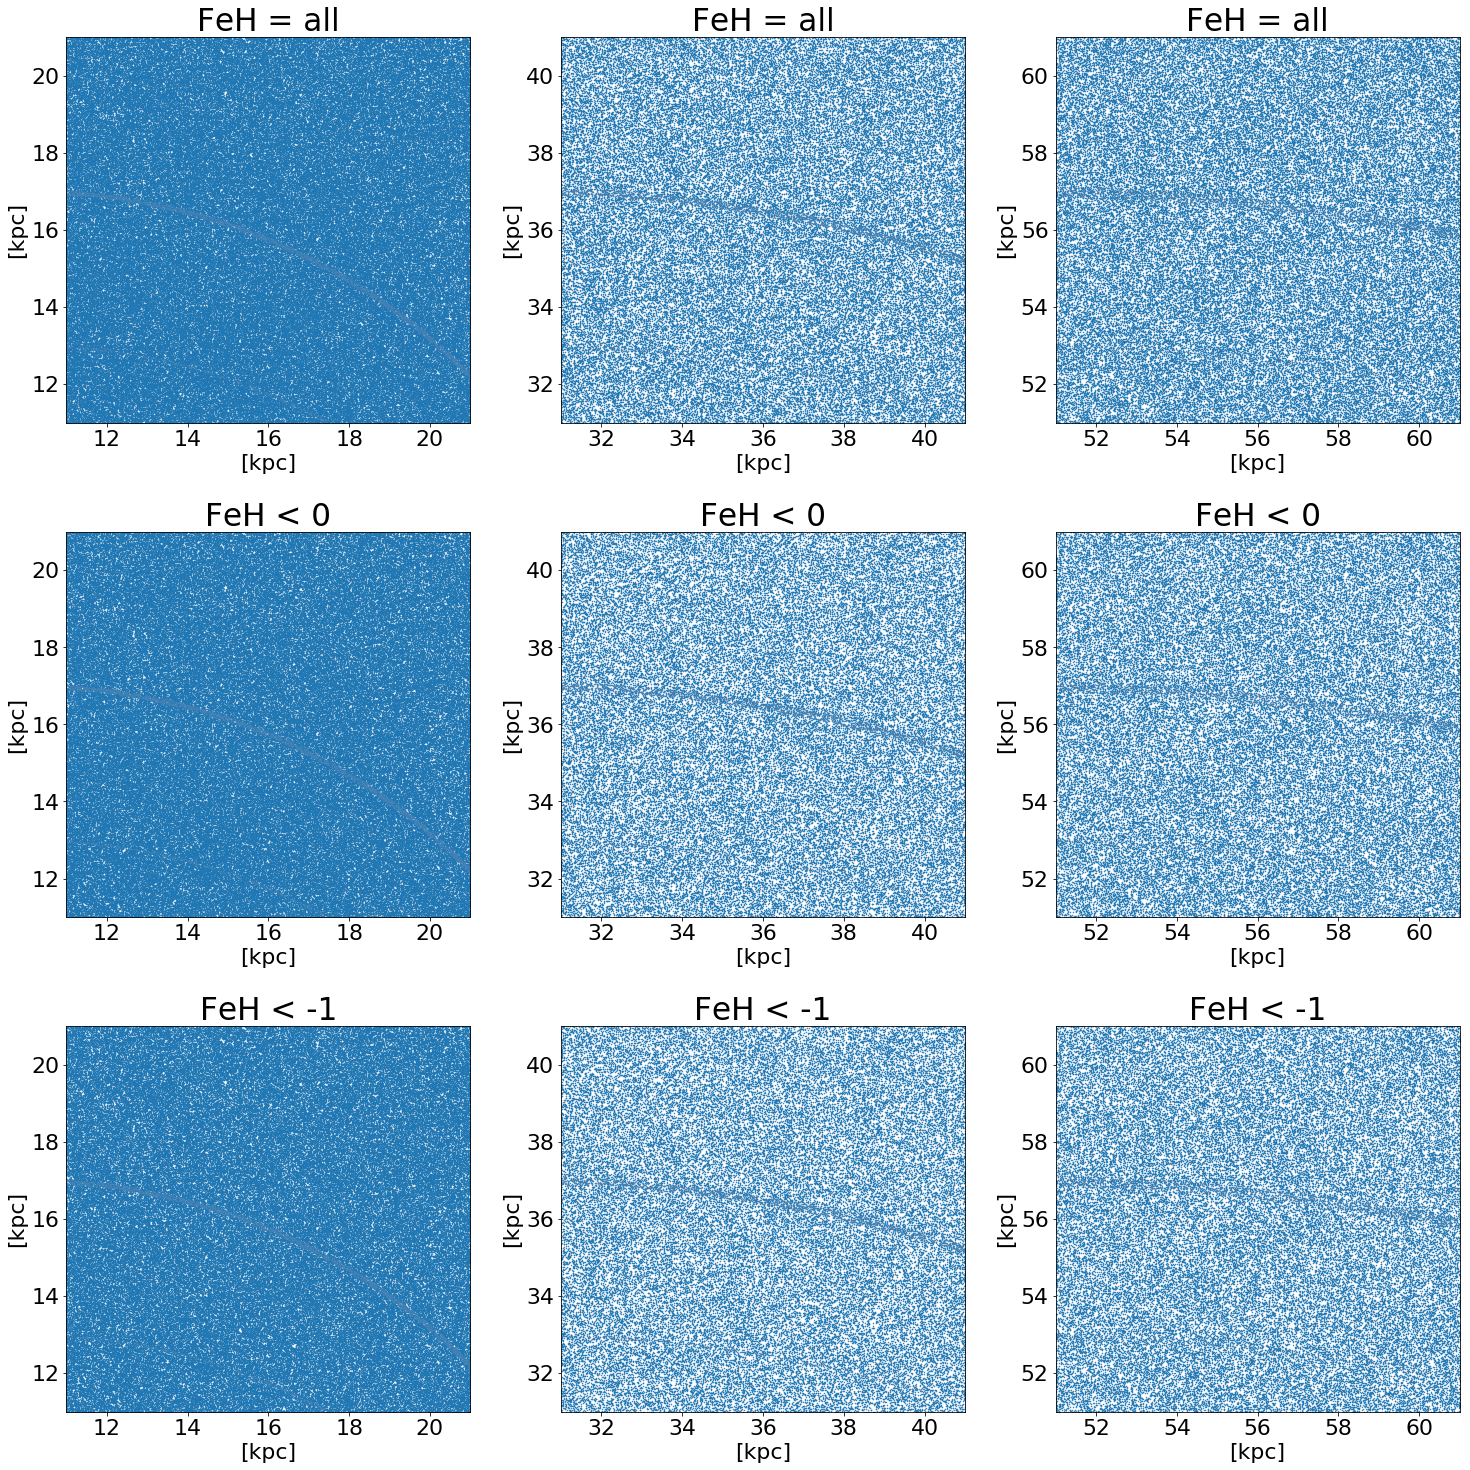

In [462]:
fig,axes = plt.subplots(3,3,figsize=(21,21))
d_conv = 785*np.pi/180
mpl.rcParams.update({'font.size': 26})
label_size = 24
mpl.rcParams['xtick.labelsize'] = 24#label_size 
mpl.rcParams['ytick.labelsize'] = 24#label_size 

sh_x = 0 #kpc
sh_y = 2 #kpc : shift the smaller stream to this radius in y so streams aren't on top of each other 

#fig.suptitle("Andromeda fields", fontsize=34, y=1.03)

#fig.suptitle("FeH all < 0", fontsize=24, y=0.03)

axes[0,0].scatter(x_box10, y_box10,s = 1, marker='.')
axes[0,0].scatter(pal5_x_GC15 + 10 + sh_x,pal5_y_GC15 - sh_y, s=1, color="steelblue", marker='.')
axes[0,0].scatter(pal5_x_m10_GC15 + 10 - sh_x,pal5_y_m10_GC15 + sh_y, s=1, color="steelblue", marker='.')
axes[0,0].set_title('FeH = all')
axes[0,0].set_xlabel('[kpc]')
axes[0,0].set_ylabel('[kpc]')


axes[0,1].scatter(x_box30, y_box30,s = 1, marker='.')
axes[0,1].scatter(pal5_x_GC35 + 30 + sh_x,pal5_y_GC35 - sh_y, s=1, color="steelblue", marker='.')
axes[0,1].scatter(pal5_x_m10_GC35 + 30 - sh_x,pal5_y_m10_GC35 + sh_y , s=1, color="steelblue", marker='.')
axes[0,1].set_title('FeH = all')
axes[0,1].set_xlabel('[kpc]')
axes[0,1].set_ylabel('[kpc]')


axes[0,2].scatter(x_box50, y_box50,s = 1, marker='.')
axes[0,2].scatter(pal5_x_GC55 + 50 +sh_x,pal5_y_GC55 -sh_y, s=1, color="steelblue", marker='.')
axes[0,2].scatter(pal5_x_m10_GC55 + 50 - sh_x,pal5_y_m10_GC55 + sh_y , s=1, color="steelblue", marker='.')
axes[0,2].set_title('FeH = all')
axes[0,2].set_xlabel('[kpc]')
axes[0,2].set_ylabel('[kpc]')

axes[0,0].set_xlim([11,21])
axes[0,0].set_ylim([11,21])
axes[0,1].set_xlim([31,41])
axes[0,1].set_ylim([31,41])
axes[0,2].set_xlim([51,61])
axes[0,2].set_ylim([51,61])

axes[1,0].scatter(x_box10[index_FeH0_10], y_box10[index_FeH0_10],s = 1, marker='.')
axes[1,0].scatter(pal5_x_GC15+ 10 + sh_x,pal5_y_GC15 - sh_y, s=1, color="steelblue", marker='.')
axes[1,0].scatter(pal5_x_m10_GC15 + 10 - sh_x,pal5_y_m10_GC15 + sh_y, s=1, color="steelblue", marker='.')
axes[1,0].set_title('FeH < 0')
axes[1,0].set_xlabel('[kpc]')
axes[1,0].set_ylabel('[kpc]')


axes[1,1].scatter(x_box30[index_FeH0_30], y_box30[index_FeH0_30],s = 1, marker='.')
axes[1,1].scatter(pal5_x_GC35 + 30 + sh_x, pal5_y_GC35 - sh_y, s=1, color="steelblue", marker='.')
axes[1,1].scatter(pal5_x_m10_GC35 + 30 - sh_x,pal5_y_m10_GC35 + sh_y, s=1, color="steelblue", marker='.')
axes[1,1].set_title('FeH < 0')
axes[1,1].set_xlabel('[kpc]')
axes[1,1].set_ylabel('[kpc]')


axes[1,2].scatter(x_box50[index_FeH0_50], y_box50[index_FeH0_50],s = 1, marker='.')
axes[1,2].scatter(pal5_x_GC55 + 50 + sh_x,pal5_y_GC55 - sh_y, s=1, color="steelblue", marker='.')
axes[1,2].scatter(pal5_x_m10_GC55 + 50 - sh_x,pal5_y_m10_GC55 + sh_y, s=1, color="steelblue", marker='.')
axes[1,2].set_title('FeH < 0')
axes[1,2].set_xlabel('[kpc]')
axes[1,2].set_ylabel('[kpc]')

axes[1,0].set_xlim([11,21])
axes[1,0].set_ylim([11,21])
axes[1,1].set_xlim([31,41])
axes[1,1].set_ylim([31,41])
axes[1,2].set_xlim([51,61])
axes[1,2].set_ylim([51,61])

axes[2,0].scatter(x_box10[index_FeH1_10], y_box10[index_FeH1_10],s = 1, marker='.')
axes[2,0].scatter(pal5_x_GC15+ 10 + sh_x,pal5_y_GC15 - sh_y, s=1, color="steelblue", marker='.')
axes[2,0].scatter(pal5_x_m10_GC15 + 10 - sh_x,pal5_y_m10_GC15 + sh_y, s=1, color="steelblue", marker='.')
axes[2,0].set_title('FeH < -1')
axes[2,0].set_xlabel('[kpc]')
axes[2,0].set_ylabel('[kpc]')


axes[2,1].scatter(x_box30[index_FeH1_30], y_box30[index_FeH1_30],s = 1, marker='.')
axes[2,1].scatter(pal5_x_GC35 + 30 + sh_x, pal5_y_GC35 - sh_y, s=1, color="steelblue", marker='.')
axes[2,1].scatter(pal5_x_m10_GC35 + 30 - sh_x,pal5_y_m10_GC35 + sh_y, s=1, color="steelblue", marker='.')
axes[2,1].set_title('FeH < -1')
axes[2,1].set_xlabel('[kpc]')
axes[2,1].set_ylabel('[kpc]')


axes[2,2].scatter(x_box50[index_FeH1_50], y_box50[index_FeH1_50],s = 1, marker='.')
axes[2,2].scatter(pal5_x_GC55 + 50 + sh_x,pal5_y_GC55 - sh_y, s=1, color="steelblue", marker='.')
axes[2,2].scatter(pal5_x_m10_GC55 + 50 - sh_x,pal5_y_m10_GC55 + sh_y, s=1, color="steelblue", marker='.')
axes[2,2].set_title('FeH < -1')
axes[2,2].set_xlabel('[kpc]')
axes[2,2].set_ylabel('[kpc]')

axes[2,0].set_xlim([11,21])
axes[2,0].set_ylim([11,21])
axes[2,1].set_xlim([31,41])
axes[2,1].set_ylim([31,41])
axes[2,2].set_xlim([51,61])
axes[2,2].set_ylim([51,61])

fig.tight_layout()
fig.savefig('Fig3_M31_WFIRST_mag2715_NewBackgrounds.png')#.pdf' ,rasterized=True)


## Calculate background sqrt(N) for various areas of streams

In [463]:
#Calculating areas:
    
    #pal5 like
A15 = 0.053 *  7.80561944 #kpc^2
A35 = 0.094 * 10.3530021
A55 = 0.127 *  12.0364343

#10 x pal 5 like
A15_m10 = 0.115 * 16.81669731
A35_m10 = 0.202 * 22.30486688
A55_m10 = 0.273 * 25.93171166

print('Pal 5 like at 15 kpc')
print(str(A15)+' [kpc^2]')
print('')
print('Pal 5 like at 35 kpc')
print(str(A35)+' [kpc^2]')
print('')
print('Pal 5 like at 55 kpc')
print(str(A55)+' [kpc^2]')
print('')
print('')
print('10 x Pal 5 like at 15 kpc')
print(str(A15_m10)+' [kpc^2]')
print('')
print('10 x Pal 5 like at 35 kpc')
print(str(A35_m10)+' [kpc^2]')
print('')
print('10 x Pal 5 like at 55 kpc')
print(str(A55_m10)+' [kpc^2]')

Pal 5 like at 15 kpc
0.41369783032 [kpc^2]

Pal 5 like at 35 kpc
0.9731821974 [kpc^2]

Pal 5 like at 55 kpc
1.5286271561 [kpc^2]


10 x Pal 5 like at 15 kpc
1.9339201906499999 [kpc^2]

10 x Pal 5 like at 35 kpc
4.50558310976 [kpc^2]

10 x Pal 5 like at 55 kpc
7.079357283180001 [kpc^2]


In [464]:
######THE BACKGROUND COUNT WILL BE UPDATE BASED ON NEW WFIRST BACKGROUNDS#####


### For various boxes calculate the background per kpc^2 
print('###################### For Pal 5-like mass ################')
print('--------For ALL [Fe/H]-----------')
print('')

box10_area_index = np.where((x_box10 > 15) & (x_box10 < 16) \
                            & (y_box10 > 15) & (y_box10 < 16) )
N_background_box10 = len(x_box10[box10_area_index])
print('Stars per kpc^2 in background at 15 kpc = ' + str(N_background_box10))
N_background_samearea_box10 = N_background_box10 * A15 # same area as stream
print('For background at 15 kpc for area of Pal5-like stream:' )
print('sqrt(N) = ' +str(np.sqrt((N_background_samearea_box10)))) # I'm multiplying by the area the stream 
#covers because this was per kpc^2 
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst/np.sqrt(N_background_samearea_box10),2)))
print('')
print('')

box30_area_index = np.where((x_box30 > 32) & (x_box30 < 33) \
                            & (y_box30 > 32) & (y_box30 < 33) )
N_background_box30 = len(x_box30[box30_area_index])
print('Stars per kpc^2 in background at 35 kpc = ' + str((N_background_box30)))
N_background_samearea_box30 = N_background_box30 * A35 # same area as stream
print('For background at 35 kpc for area of Pal5-like stream:')
print('sqrt(N) = ' +str(np.sqrt((N_background_samearea_box30))))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst/np.sqrt(N_background_samearea_box30),2)))
print('')
print('')

box50_area_index = np.where((x_box50 > 52) & (x_box50 < 53) \
                            & (y_box50 > 52) & (y_box50 < 53) )
N_background_box50 = len(x_box50[box50_area_index])
print('Stars per kpc^2 in background at 55 kpc = ' + str((N_background_box50)))
N_background_samearea_box50 = N_background_box50 * A55 # same area as stream
print('For background at 35 kpc for area of Pal5-like stream:')
print('sqrt(N) = ' + str(np.sqrt(N_background_samearea_box50)))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst/np.sqrt(N_background_samearea_box50),2)))
print('')
print('')
print('')



print('--------For [Fe/H] < 0 -----------')
print('')

box10_area_index = np.where((x_box10[index_FeH0_10] > 15) & (x_box10[index_FeH0_10] < 16) \
                            & (y_box10[index_FeH0_10] > 15) & (y_box10[index_FeH0_10] < 16) )
N_background_box10 = len(x_box10[index_FeH0_10][box10_area_index])
print('Stars per kpc^2 in background at 15 kpc = ' + str(N_background_box10))
N_background_samearea_box10 = N_background_box10 * A15 # same area as stream
print('For background at 15 kpc for area of Pal5-like stream:' )
print('sqrt(N) = ' +str(np.sqrt((N_background_samearea_box10)))) # I'm multiplying by the area the stream 
#covers because this was per kpc^2 
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst/np.sqrt(N_background_samearea_box10),2)))
print('')
print('')

box30_area_index = np.where((x_box30[index_FeH0_30] > 32) & (x_box30[index_FeH0_30] < 33) \
                            & (y_box30[index_FeH0_30] > 32) & (y_box30[index_FeH0_30] < 33) )
N_background_box30 = len(x_box30[index_FeH0_30][box30_area_index])
print('Stars per kpc^2 in background at 35 kpc = ' + str((N_background_box30)))
N_background_samearea_box30 = N_background_box30 * A35 # same area as stream
print('For background at 35 kpc for area of Pal5-like stream:')
print('sqrt(N) = ' + str(np.round(np.sqrt(N_background_samearea_box30))))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst/np.sqrt(N_background_samearea_box30),2)))
print('')
print('')

box50_area_index = np.where((x_box50[index_FeH0_50] > 52) & (x_box50[index_FeH0_50] < 53) \
                            & (y_box50[index_FeH0_50] > 52) & (y_box50[index_FeH0_50] < 53) )
N_background_box50 = len(x_box50[index_FeH0_50][box50_area_index])
print('Stars per kpc^2 in background at 55 kpc = ' + str((N_background_box50)))
N_background_samearea_box50 = N_background_box50 * A55 # same area as stream
print('For background at 35 kpc for area of Pal5-like stream:')
print('sqrt(N) = ' + str(np.sqrt(N_background_samearea_box50)))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst/np.sqrt(N_background_samearea_box50),2)))
print('')
print('')
print('')


print('--------For [Fe/H] < -1 -----------')
print('')

box10_area_index = np.where((x_box10[index_FeH1_10] > 15) & (x_box10[index_FeH1_10] < 16) \
                            & (y_box10[index_FeH1_10] > 15) & (y_box10[index_FeH1_10] < 16) )
N_background_box10 = len(x_box10[index_FeH1_10][box10_area_index])
print('Stars per kpc^2 in background at 15 kpc = ' + str(N_background_box10))
N_background_samearea_box10 = N_background_box10 * A15 # same area as stream
print('For background at 15 kpc for area of Pal5-like stream:' )
print('sqrt(N) = ' +str(np.sqrt((N_background_samearea_box10)))) # I'm multiplying by the area the stream 
#covers because this was per kpc^2 
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst/np.sqrt(N_background_samearea_box10),2)))
print('')
print('')

box30_area_index = np.where((x_box30[index_FeH1_30] > 32) & (x_box30[index_FeH1_30] < 33) \
                            & (y_box30[index_FeH1_30] > 32) & (y_box30[index_FeH1_30] < 33) )
N_background_box30 = len(x_box30[index_FeH1_30][box30_area_index])
print('Stars per kpc^2 in background at 35 kpc = ' + str((N_background_box30)))
N_background_samearea_box30 = N_background_box30 * A35 # same area as stream
print('For background at 35 kpc for area of Pal5-like stream:')
print('sqrt(N) = ' +str(np.sqrt((N_background_samearea_box30))))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst/np.sqrt(N_background_samearea_box30),2)))
print('')
print('')

box50_area_index = np.where((x_box50[index_FeH1_50] > 52) & (x_box50[index_FeH1_50] < 53) \
                            & (y_box50[index_FeH1_50] > 52) & (y_box50[index_FeH1_50] < 53) )
N_background_box50 = len(x_box50[index_FeH1_50][box50_area_index])
print('Stars per kpc^2 in background at 55 kpc = ' + str((N_background_box50)))
N_background_samearea_box50 = N_background_box50 * A55 # same area as stream
print('For background at 35 kpc for area of Pal5-like stream:')
print('sqrt(N) = ' + str(np.sqrt(N_background_samearea_box50)))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst/np.sqrt(N_background_samearea_box50),2)))
print('')


###################### For Pal 5-like mass ################
--------For ALL [Fe/H]-----------

Stars per kpc^2 in background at 15 kpc = 2291
For background at 15 kpc for area of Pal5-like stream:
sqrt(N) = 30.786063880644438
N_stars_pal5/sqrt(N_background) = 7.96


Stars per kpc^2 in background at 35 kpc = 750
For background at 35 kpc for area of Pal5-like stream:
sqrt(N) = 27.01641441883064
N_stars_pal5/sqrt(N_background) = 9.07


Stars per kpc^2 in background at 55 kpc = 735
For background at 35 kpc for area of Pal5-like stream:
sqrt(N) = 33.51926251774493
N_stars_pal5/sqrt(N_background) = 7.31



--------For [Fe/H] < 0 -----------

Stars per kpc^2 in background at 15 kpc = 2212
For background at 15 kpc for area of Pal5-like stream:
sqrt(N) = 30.250613227963495
N_stars_pal5/sqrt(N_background) = 8.1


Stars per kpc^2 in background at 35 kpc = 667
For background at 35 kpc for area of Pal5-like stream:
sqrt(N) = 25.0
N_stars_pal5/sqrt(N_background) = 9.62


Stars per kpc^2 in backgroun

In [465]:
### For various boxes calculate the background per kpc^2 
print('###################### For 10 x Pal 5-like mass ################')
print('--------For ALL [Fe/H]-----------')
print('')

box10_area_index = np.where((x_box10 > 15) & (x_box10 < 16) \
                            & (y_box10 > 15) & (y_box10 < 16) )
N_background_box10 = len(x_box10[box10_area_index])
print('Stars per kpc^2 in background at 15 kpc = ' + str(N_background_box10))
N_background_samearea_box10 = N_background_box10 * A15_m10 # same area as stream
print('For background at 15 kpc for area of 10 x Pal5-like stream:' )
print('sqrt(N) = ' +str(np.sqrt((N_background_samearea_box10)))) # I'm multiplying by the area the stream 
#covers because this was per kpc^2 
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst_m10/np.sqrt(N_background_samearea_box10),2)))
print('')
print('')

box30_area_index = np.where((x_box30 > 32) & (x_box30 < 33) \
                            & (y_box30 > 32) & (y_box30 < 33) )
N_background_box30 = len(x_box30[box30_area_index])
print('Stars per kpc^2 in background at 35 kpc = ' + str((N_background_box30)))
N_background_samearea_box30 = N_background_box30 * A35_m10 # same area as stream
print('For background at 35 kpc for area of 10 x Pal5-like stream:')
print('sqrt(N) = ' +str(np.sqrt((N_background_samearea_box30))))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst_m10/np.sqrt(N_background_samearea_box30),2)))
print('')
print('')

box50_area_index = np.where((x_box50 > 52) & (x_box50 < 53) \
                            & (y_box50 > 52) & (y_box50 < 53) )
N_background_box50 = len(x_box50[box50_area_index])
print('Stars per kpc^2 in background at 55 kpc = ' + str((N_background_box50)))
N_background_samearea_box50 = N_background_box50 * A55_m10 # same area as stream
print('For background at 35 kpc for area of 10 x Pal5-like stream:')
print('sqrt(N) = ' + str(np.sqrt(N_background_samearea_box50)))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst_m10/np.sqrt(N_background_samearea_box50),2)))
print('')
print('')
print('')



print('--------For [Fe/H] < 0 -----------')
print('')

box10_area_index = np.where((x_box10[index_FeH0_10] > 15) & (x_box10[index_FeH0_10] < 16) \
                            & (y_box10[index_FeH0_10] > 15) & (y_box10[index_FeH0_10] < 16) )
N_background_box10 = len(x_box10[index_FeH0_10][box10_area_index])
print('Stars per kpc^2 in background at 15 kpc = ' + str(N_background_box10))
N_background_samearea_box10 = N_background_box10 * A15_m10 # same area as stream
print('For background at 15 kpc for area of 10 x Pal5-like stream:' )
print('sqrt(N) = ' +str(np.sqrt((N_background_samearea_box10)))) # I'm multiplying by the area the stream 
#covers because this was per kpc^2 
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst_m10/np.sqrt(N_background_samearea_box10),2)))
print('')
print('')

box30_area_index = np.where((x_box30[index_FeH0_30] > 32) & (x_box30[index_FeH0_30] < 33) \
                            & (y_box30[index_FeH0_30] > 32) & (y_box30[index_FeH0_30] < 33) )
N_background_box30 = len(x_box30[index_FeH0_30][box30_area_index])
print('Stars per kpc^2 in background at 35 kpc = ' + str((N_background_box30)))
N_background_samearea_box30 = N_background_box30 * A35_m10 # same area as stream
print('For background at 35 kpc for area of 10 x Pal5-like stream:')
print('sqrt(N) = ' + str(np.round(np.sqrt(N_background_samearea_box30))))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst_m10/np.sqrt(N_background_samearea_box30),2)))
print('')
print('')

box50_area_index = np.where((x_box50[index_FeH0_50] > 52) & (x_box50[index_FeH0_50] < 53) \
                            & (y_box50[index_FeH0_50] > 52) & (y_box50[index_FeH0_50] < 53) )
N_background_box50 = len(x_box50[index_FeH0_50][box50_area_index])
print('Stars per kpc^2 in background at 55 kpc = ' + str((N_background_box50)))
N_background_samearea_box50 = N_background_box50 * A55_m10 # same area as stream
print('For background at 35 kpc for area of 10 x Pal5-like stream:')
print('sqrt(N) = ' + str(np.sqrt(N_background_samearea_box50)))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst_m10/np.sqrt(N_background_samearea_box50),2)))
print('')
print('')
print('')


print('--------For [Fe/H] < -1 -----------')
print('')

box10_area_index = np.where((x_box10[index_FeH1_10] > 15) & (x_box10[index_FeH1_10] < 16) \
                            & (y_box10[index_FeH1_10] > 15) & (y_box10[index_FeH1_10] < 16) )
N_background_box10 = len(x_box10[index_FeH1_10][box10_area_index])
print('Stars per kpc^2 in background at 15 kpc = ' + str(N_background_box10))
N_background_samearea_box10 = N_background_box10 * A15_m10 # same area as stream
print('For background at 15 kpc for area of 10 x Pal5-like stream:' )
print('sqrt(N) = ' +str(np.sqrt((N_background_samearea_box10)))) # I'm multiplying by the area the stream 
#covers because this was per kpc^2 
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst_m10/np.sqrt(N_background_samearea_box10),2)))
print('')
print('')

box30_area_index = np.where((x_box30[index_FeH1_30] > 32) & (x_box30[index_FeH1_30] < 33) \
                            & (y_box30[index_FeH1_30] > 32) & (y_box30[index_FeH1_30] < 33) )
N_background_box30 = len(x_box30[index_FeH1_30][box30_area_index])
print('Stars per kpc^2 in background at 35 kpc = ' + str((N_background_box30)))
N_background_samearea_box30 = N_background_box30 * A35_m10 # same area as stream
print('For background at 35 kpc for area of 10 x Pal5-like stream:')
print('sqrt(N) = ' +str(np.sqrt((N_background_samearea_box30))))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst_m10/np.sqrt(N_background_samearea_box30),2)))
print('')
print('')

box50_area_index = np.where((x_box50[index_FeH1_50] > 52) & (x_box50[index_FeH1_50] < 53) \
                            & (y_box50[index_FeH1_50] > 52) & (y_box50[index_FeH1_50] < 53) )
N_background_box50 = len(x_box50[index_FeH1_50][box50_area_index])
print('Stars per kpc^2 in background at 55 kpc = ' + str((N_background_box50)))
N_background_samearea_box50 = N_background_box50 * A55_m10 # same area as stream
print('For background at 35 kpc for area of 10 x Pal5-like stream:')
print('sqrt(N) = ' + str(np.sqrt(N_background_samearea_box50)))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst_m10/np.sqrt(N_background_samearea_box50),2)))
print('')


###################### For 10 x Pal 5-like mass ################
--------For ALL [Fe/H]-----------

Stars per kpc^2 in background at 15 kpc = 2291
For background at 15 kpc for area of 10 x Pal5-like stream:
sqrt(N) = 66.56283615336075
N_stars_pal5/sqrt(N_background) = 37.06


Stars per kpc^2 in background at 35 kpc = 750
For background at 35 kpc for area of 10 x Pal5-like stream:
sqrt(N) = 58.1307778403145
N_stars_pal5/sqrt(N_background) = 42.44


Stars per kpc^2 in background at 55 kpc = 735
For background at 35 kpc for area of 10 x Pal5-like stream:
sqrt(N) = 72.13409459567161
N_stars_pal5/sqrt(N_background) = 34.2



--------For [Fe/H] < 0 -----------

Stars per kpc^2 in background at 15 kpc = 2212
For background at 15 kpc for area of 10 x Pal5-like stream:
sqrt(N) = 65.40513329791324
N_stars_pal5/sqrt(N_background) = 37.72


Stars per kpc^2 in background at 35 kpc = 667
For background at 35 kpc for area of 10 x Pal5-like stream:
sqrt(N) = 55.0
N_stars_pal5/sqrt(N_background) = 45.0

## WHAT IS C_ERR FOR GIVEN DISTANCE AND BACKGROUND

In [466]:
# #####READ IN WFIRST LIKE BACKGROUND FIELDS ######


# from astropy.io.votable import parse_single_table
# table_box10 = parse_single_table("/Users/spearson/Desktop/Research/Pal5External/M31_10_20kpc_new.vot").to_table()
# table_box30 = parse_single_table("/Users/spearson/Desktop/Research/Pal5External/M31_30_40kpc_new.vot").to_table()
# table_box50 = parse_single_table("/Users/spearson/Desktop/Research/Pal5External/M31_50_60kpc_new.vot").to_table()

table_box35_3MPC = np.genfromtxt('WFIfilters_extendedIsochrones_M31_30_40kpc_3.50Mpc.txt')
table_box35_7MPC = np.genfromtxt('WFIfilters_extendedIsochrones_M31_30_40kpc_7.18Mpc.txt')

#####This is now the M31 one######
table_box35_20MPC = np.genfromtxt('WFIfilters_extendedIsochrones_M31_30_40kpc.txt')


#np.genfromtxt('WFIfilters_extendedIsochrones_M31_30_40kpc_20Mpc.txt')


In [467]:
print(table_box35_3MPC[index_FeH0_35_3].shape)
print(table_box35_7MPC[index_FeH0_35_7].shape)
print(table_box35_20MPC[index_FeH0_35_20].shape)

(15389, 3)
(12831, 3)
(15389, 3)


In [468]:
### Make metallicity cuts

index_FeH0_35_3 = np.where(table_box35_3MPC[:,2] < 0)
index_FeH0_35_7 = np.where(table_box35_7MPC[:,2] < 0)
index_FeH0_35_20 = np.where(table_box35_20MPC[:,2] < 0)


In [469]:
d_conv = 785*np.pi/180 #To go from deg to kpc in Andromeda


x_box35_3 = table_box35_3MPC[:,0][index_FeH0_35_3]*(-d_conv)
y_box35_3 = table_box35_3MPC[:,1][index_FeH0_35_3]*(d_conv)
#g_box10 = table_box10['g']
#i_box10 = table_box10['i']

x_box35_7 = table_box35_7MPC[:,0][index_FeH0_35_7]*(-d_conv)
y_box35_7= table_box35_7MPC[:,1][index_FeH0_35_7]*(d_conv)
#g_box30 = table_box30['g']
#i_box30 = table_box30['i']

x_box35_20 = table_box35_20MPC[:,0][index_FeH0_35_20]*(-d_conv)
y_box35_20= table_box35_20MPC[:,1][index_FeH0_35_20]*(d_conv)
#g_box50 = table_box50['g']
#i_box50 = table_box50['i']

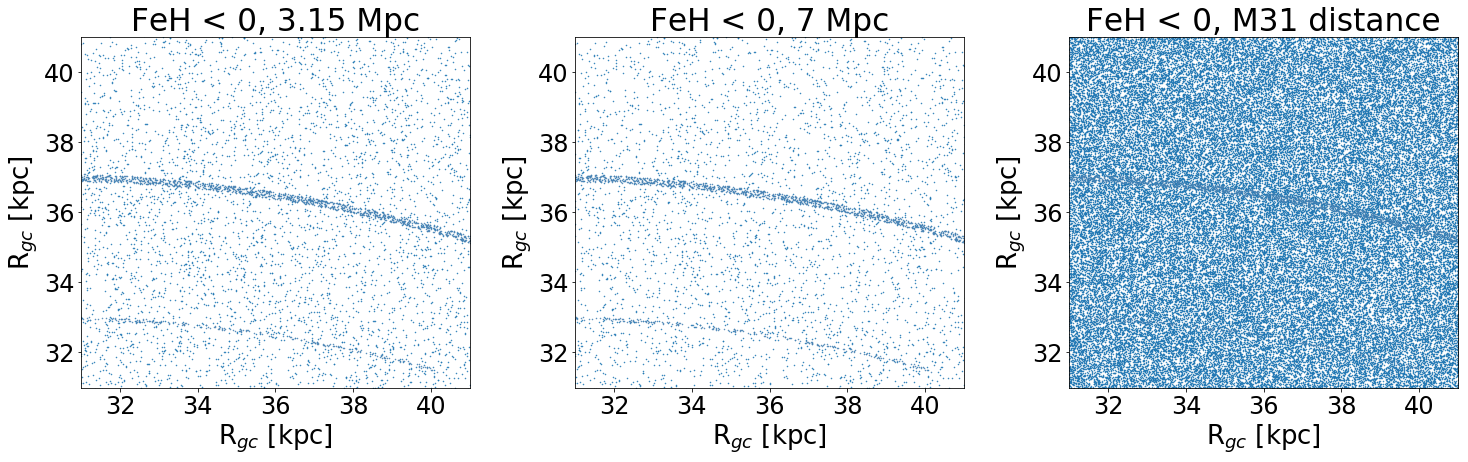

In [470]:
fig,axes = plt.subplots(1,3,figsize=(21,7))
#d_conv = 770*np.pi/180
mpl.rcParams.update({'font.size': 26})
label_size = 24
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

sh_x = 0 #kpc
sh_y = 2 #kpc : shift the smaller stream to this radius in y so streams aren't on top of each other 

#fig.suptitle("Andromeda fields", fontsize=34, y=1.03)

#fig.suptitle("FeH all < 0", fontsize=24, y=0.03)

axes[0].scatter(x_box35_3, y_box35_3,s = 1, marker='.')
axes[0].scatter(pal5_x_GC35 + 30 + sh_x,pal5_y_GC35 - sh_y, s=1, color="steelblue", marker='.')
axes[0].scatter(pal5_x_m10_GC35 + 30 - sh_x,pal5_y_m10_GC35 + sh_y, s=1, color="steelblue", marker='.')
axes[0].set_title('FeH < 0, 3.15 Mpc')
axes[0].set_xlabel('R$_{gc}$ [kpc]')
axes[0].set_ylabel('R$_{gc}$ [kpc]')


axes[1].scatter(x_box35_7, y_box35_7,s = 1, marker='.')
axes[1].scatter(pal5_x_GC35 + 30 + sh_x,pal5_y_GC35 - sh_y, s=1, color="steelblue", marker='.')
axes[1].scatter(pal5_x_m10_GC35 + 30 - sh_x,pal5_y_m10_GC35 + sh_y , s=1, color="steelblue", marker='.')
axes[1].set_title('FeH < 0, 7 Mpc')
axes[1].set_xlabel('R$_{gc}$ [kpc]')
axes[1].set_ylabel('R$_{gc}$ [kpc]')


axes[2].scatter(x_box35_20, y_box35_20,s = 1, marker='.')
axes[2].scatter(pal5_x_GC35 + 30 +sh_x,pal5_y_GC35 -sh_y, s=1, color="steelblue", marker='.')
axes[2].scatter(pal5_x_m10_GC35 + 30 - sh_x,pal5_y_m10_GC35 + sh_y , s=1, color="steelblue", marker='.')
axes[2].set_title('FeH < 0, M31 distance')
axes[2].set_xlabel('R$_{gc}$ [kpc]')
axes[2].set_ylabel('R$_{gc}$ [kpc]')

axes[0].set_xlim([31,41])
axes[0].set_ylim([31,41])
axes[1].set_xlim([31,41])
axes[1].set_ylim([31,41])
axes[2].set_xlim([31,41])
axes[2].set_ylim([31,41])


fig.tight_layout()
#fig.savefig('Fig3_M31_WFIRST_mag2715.png')#.pdf' ,rasterized=True)


In [471]:
print('###################### For Pal 5-like mass ################')
print('--------For ALL [Fe/H]-----------')
print('')

box35_3_area_index = np.where((x_box35_3 > 35) & (x_box35_3 < 36) \
                            & (y_box35_3 > 35) & (y_box35_3 < 36) )
N_background_box35_3 = len(x_box35_3[box35_3_area_index])
print('Stars per kpc^2 in background at 35 kpc, at 3 MPC = ' + str(N_background_box35_3))
N_background_samearea_box35_3 = N_background_box35_3 * A35 # same area as stream
print('For background at at 35 kpc, at MPC = 3 for area of Pal5-like stream:' )
print('sqrt(N) = ' +str(np.sqrt((N_background_samearea_box35_3)))) # I'm multiplying by the area the stream 
#covers because this was per kpc^2 
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst/np.sqrt(N_background_samearea_box35_3),2)))
print('')
print('')

box35_7_area_index = np.where((x_box35_7 > 35) & (x_box35_7 < 36) \
                            & (y_box35_7 > 35) & (y_box35_7 < 36) )
N_background_box35_7= len(x_box35_7[box35_7_area_index])
print('Stars per kpc^2 in background at 35 kpc  at 7 mpc = ' + str((N_background_box35_7)))
N_background_samearea_box35_7 = N_background_box35_7 * A35 # same area as stream
print('For background at 35 kpc at 7 Mpc for area of Pal5-like stream:')
print('sqrt(N) = ' +str(np.sqrt((N_background_samearea_box35_7))))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst/np.sqrt(N_background_samearea_box35_7),2)))
print('')
print('')

box35_20_area_index = np.where((x_box35_20 > 35) & (x_box35_20 <36) \
                            & (y_box35_20 > 35) & (y_box35_20 < 36) )
N_background_box35_20 = len(x_box35_20[box35_20_area_index])
print('Stars per kpc^2 in background at 35 kpc at M31 = ' + str((N_background_box35_20)))
N_background_samearea_box35_20 = N_background_box35_20 * A35 # same area as stream
print('For background at 35 kpc for area of Pal5-like stream:')
print('sqrt(N) = ' + str(np.sqrt(N_background_samearea_box35_20)))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst/np.sqrt(N_background_samearea_box35_20),2)))
print('')
print('')
print('')
print('')
print('')
print('')




print('###################### For 10 x Pal 5-like mass ################')
print('--------For ALL [Fe/H]-----------')
print('')

box35_3_area_index = np.where((x_box35_3 > 35) & (x_box35_3 < 36) \
                            & (y_box35_3 > 35) & (y_box35_3 < 36) )
N_background_box35_3 = len(x_box35_3[box35_3_area_index])
print('Stars per kpc^2 in background at 35 kpc, at 3 Mpc =' + str(N_background_box35_3))
N_background_samearea_box35_3= N_background_box35_3 * A35_m10 # same area as stream
print('For background at at 35 kpc, at MPC = 3 for area of Pal5-like stream:' )
print('sqrt(N) = ' +str(np.sqrt((N_background_samearea_box35_3)))) # I'm multiplying by the area the stream 
#covers because this was per kpc^2 
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst_m10/np.sqrt(N_background_samearea_box35_3),2)))
print('')
print('')

box35_7_area_index = np.where((x_box35_7 > 35) & (x_box35_7 < 36) \
                            & (y_box35_7 > 35) & (y_box35_7 < 36) )
N_background_box35_7= len(x_box35_7[box35_7_area_index])
print('Stars per kpc^2 in background at 35 kpc  at 7 Mpc = ' + str((N_background_box35_7)))
N_background_samearea_box35_7 = N_background_box35_7 * A35_m10 # same area as stream
print('For background at 35 kpc at 7 Mpc for area of Pal5-like stream:')
print('sqrt(N) = ' +str(np.sqrt((N_background_samearea_box35_7))))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst_m10/np.sqrt(N_background_samearea_box35_7),2)))
print('')
print('')

box35_20_area_index = np.where((x_box35_20 > 35) & (x_box35_20 < 36) \
                            & (y_box35_20 > 35) & (y_box35_20 < 36) )
N_background_box35_20 = len(x_box35_20[box35_20_area_index])
print('Stars per kpc^2 in background at 35 kpc at M31 = ' + str((N_background_box35_20)))
N_background_samearea_box35_20 = N_background_box35_20 * A35_m10 # same area as stream
print('For background at 35 kpc for area of Pal5-like stream:')
print('sqrt(N) = ' + str(np.sqrt(N_background_samearea_box35_20)))
print('N_stars_pal5/sqrt(N_background) = ' +\
      str(np.round(nstars_wfirst_m10/np.sqrt(N_background_samearea_box35_20),2)))
print('')
print('')
print('')

###################### For Pal 5-like mass ################
--------For ALL [Fe/H]-----------

Stars per kpc^2 in background at 35 kpc, at 3 MPC = 49
For background at at 35 kpc, at MPC = 3 for area of Pal5-like stream:
sqrt(N) = 6.9054998133806365
N_stars_pal5/sqrt(N_background) = 35.48


Stars per kpc^2 in background at 35 kpc  at 7 mpc = 41
For background at 35 kpc at 7 Mpc for area of Pal5-like stream:
sqrt(N) = 6.316681889520795
N_stars_pal5/sqrt(N_background) = 38.79


Stars per kpc^2 in background at 35 kpc at M31 = 714
For background at 35 kpc for area of Pal5-like stream:
sqrt(N) = 26.36004721057229
N_stars_pal5/sqrt(N_background) = 9.29






###################### For 10 x Pal 5-like mass ################
--------For ALL [Fe/H]-----------

Stars per kpc^2 in background at 35 kpc, at 3 Mpc =49
For background at at 35 kpc, at MPC = 3 for area of Pal5-like stream:
sqrt(N) = 14.85845121061546
N_stars_pal5/sqrt(N_background) = 166.03


Stars per kpc^2 in background at 35 kpc  at 